In [1]:
import tensorflow as tf

In [2]:
import numpy as np

神经元的基本结构

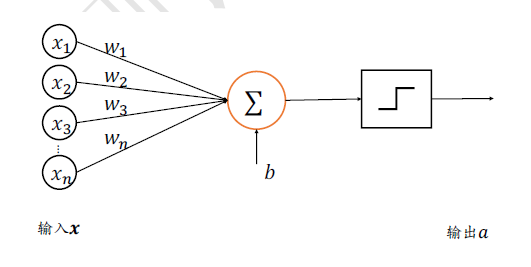

## 张量的创建方式

In [3]:
x = tf.random.normal([2,784])

2022-09-14 00:52:45.888364: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-14 00:52:45.888451: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (liuyq-Workstation): /proc/driver/nvidia/version does not exist


In [4]:
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))

In [5]:
x

<tf.Tensor: shape=(2, 784), dtype=float32, numpy=
array([[-0.88212293,  2.011423  ,  0.33801815, ..., -0.81516975,
         0.45951754, -1.9795761 ],
       [-0.58138436,  1.2578579 , -0.0693097 , ...,  0.24195221,
        -0.41264117,  1.4069537 ]], dtype=float32)>

In [6]:
w1

<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32, numpy=
array([[ 0.06413224, -0.08739329, -0.08433124, ...,  0.05322883,
         0.0800864 ,  0.09406754],
       [-0.12915033,  0.05879213,  0.09019995, ...,  0.07061453,
         0.01410423,  0.16631801],
       [-0.063035  , -0.01602458,  0.08212316, ...,  0.02040334,
        -0.16605754, -0.02276212],
       ...,
       [ 0.04661525,  0.02549985, -0.01590716, ...,  0.05631245,
         0.10559537, -0.00088506],
       [-0.04243413, -0.15733892,  0.10015501, ..., -0.1575324 ,
        -0.07262256,  0.12051548],
       [ 0.03644207,  0.08854585, -0.01530368, ..., -0.04640802,
        -0.01464161, -0.08835942]], dtype=float32)>

In [7]:
b1 = tf.Variable(tf.zeros([256]))

In [8]:
b1

<tf.Variable 'Variable:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 

In [9]:
o1 = tf.matmul(x,w1) + b1

In [10]:
o1.shape

TensorShape([2, 256])

In [11]:
o1[:,:5]

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-3.424455  ,  0.35296595,  1.0287167 ,  2.0033758 ,  0.4077121 ],
       [ 0.9136364 ,  0.04843616, -2.092989  ,  5.406645  ,  2.9212928 ]],
      dtype=float32)>

In [12]:
o1 = tf.nn.relu(o1)

In [13]:
o1.shape

TensorShape([2, 256])

In [14]:
o1[:,:5]

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.        , 0.35296595, 1.0287167 , 2.0033758 , 0.4077121 ],
       [0.9136364 , 0.04843616, 0.        , 5.406645  , 2.9212928 ]],
      dtype=float32)>

一个线性变换的实例

In [15]:
x = tf.random.normal([2,784])
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
o1 = tf.matmul(x,w1) + b1 # 线性变换
o1 = tf.nn.relu(o1) # 激活函数

In [16]:
x.shape

TensorShape([2, 784])

In [17]:
o1.shape

TensorShape([2, 256])

## 层方式实现一个线性变换

In [18]:
x_new = tf.random.normal([4,28*28])
from tensorflow.keras import layers # 导入层模块

In [19]:
# 创建全连接层，指定输出节点数和激活函数
fc = layers.Dense(512, activation=tf.nn.relu)
h1 = fc(x_new) # 通过fc 类实例完成一次全连接层的计算，返回输出张量

In [20]:
x.shape

TensorShape([2, 784])

In [21]:
h1.shape

TensorShape([4, 512])

### 查看fc的属性

In [22]:
#这里的kernel，是指w
fc.kernel

<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[ 0.0387257 , -0.03637442, -0.01409915, ..., -0.04173186,
         0.01308553, -0.02474366],
       [-0.05871486,  0.03172942, -0.0132503 , ..., -0.06648651,
        -0.05279992,  0.0398904 ],
       [-0.06100874,  0.01615536,  0.0013855 , ..., -0.04296927,
        -0.01631684,  0.03067265],
       ...,
       [ 0.03076965, -0.00429072, -0.04579864, ..., -0.00313221,
         0.02973998,  0.05405255],
       [-0.03211744, -0.00517325, -0.01510322, ...,  0.05651995,
        -0.03842103,  0.00190783],
       [-0.02976267, -0.04423936, -0.00666913, ..., -0.031578  ,
        -0.04109211, -0.0280639 ]], dtype=float32)>

In [23]:
fc.bias # 获取Dense 类的偏置向量

<tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
fc.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.0387257 , -0.03637442, -0.01409915, ..., -0.04173186,
          0.01308553, -0.02474366],
        [-0.05871486,  0.03172942, -0.0132503 , ..., -0.06648651,
         -0.05279992,  0.0398904 ],
        [-0.06100874,  0.01615536,  0.0013855 , ..., -0.04296927,
         -0.01631684,  0.03067265],
        ...,
        [ 0.03076965, -0.00429072, -0.04579864, ..., -0.00313221,
          0.02973998,  0.05405255],
        [-0.03211744, -0.00517325, -0.01510322, ...,  0.05651995,
         -0.03842103,  0.00190783],
        [-0.02976267, -0.04423936, -0.00666913, ..., -0.031578  ,
         -0.04109211, -0.0280639 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [25]:
fc.variables #返回所有参数列表

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.0387257 , -0.03637442, -0.01409915, ..., -0.04173186,
          0.01308553, -0.02474366],
        [-0.05871486,  0.03172942, -0.0132503 , ..., -0.06648651,
         -0.05279992,  0.0398904 ],
        [-0.06100874,  0.01615536,  0.0013855 , ..., -0.04296927,
         -0.01631684,  0.03067265],
        ...,
        [ 0.03076965, -0.00429072, -0.04579864, ..., -0.00313221,
          0.02973998,  0.05405255],
        [-0.03211744, -0.00517325, -0.01510322, ...,  0.05651995,
         -0.03842103,  0.00190783],
        [-0.02976267, -0.04423936, -0.00666913, ..., -0.031578  ,
         -0.04109211, -0.0280639 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## 神经网络的基本结构

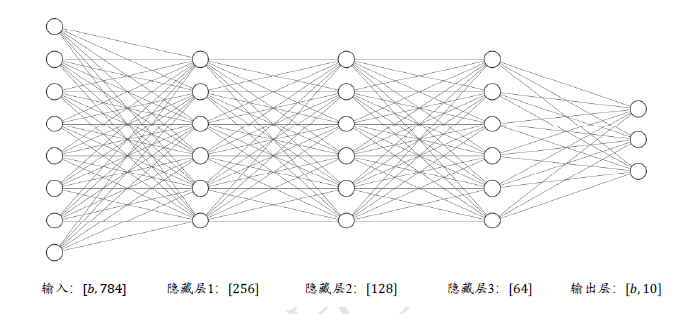

### 手动实现方式

In [26]:
# 隐藏层1 张量
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 隐藏层2 张量
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
# 隐藏层3 张量
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
# 输出层张量
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

In [27]:
with tf.GradientTape() as tape: # 梯度记录器
    # x: [b, 28*28]
    # 隐藏层1 前向计算，[b, 28*28] => [b, 256]
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)
    # 隐藏层2 前向计算，[b, 256] => [b, 128]
    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2)
    # 隐藏层3 前向计算，[b, 128] => [b, 64]
    h3 = h2@w3 + b3
    h3 = tf.nn.relu(h3)
    # 输出层前向计算，[b, 64] => [b, 10]
    h4 = h3@w4 + b4

In [28]:
# 导入常用网络层layers
from tensorflow.keras import layers,Sequential

fc1 = layers.Dense(256, activation=tf.nn.relu) # 隐藏层1
fc2 = layers.Dense(128, activation=tf.nn.relu) # 隐藏层2
fc3 = layers.Dense(64, activation=tf.nn.relu) # 隐藏层3
fc4 = layers.Dense(10, activation=None) # 输出层

In [29]:
x = tf.random.normal([4,28*28])
h1 = fc1(x) # 通过隐藏层1 得到输出
h2 = fc2(h1) # 通过隐藏层2 得到输出
h3 = fc3(h2) # 通过隐藏层3 得到输出
h4 = fc4(h3) # 通过输出层得到网络输出

In [30]:
print("x的形状为:", x.shape,"\n",
     "h1的形状为:", h1.shape,"\n",
     "h2的形状为:", h2.shape,"\n",
     "h3的形状为:", h3.shape,"\n",
     "h4的形状为:", h4.shape,"\n",)

x的形状为: (4, 784) 
 h1的形状为: (4, 256) 
 h2的形状为: (4, 128) 
 h3的形状为: (4, 64) 
 h4的形状为: (4, 10) 



### 基于序列容器模型实现导入

In [31]:
# 导入Sequential 容器
from tensorflow.keras import layers,Sequential

In [32]:
# 通过Sequential 容器封装为一个网络类
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu) , # 创建隐藏层1
    layers.Dense(128, activation=tf.nn.relu) , # 创建隐藏层2
    layers.Dense(64, activation=tf.nn.relu) , # 创建隐藏层3
    layers.Dense(10, activation=None) , # 创建输出层
])

In [33]:
out = model(x)

In [34]:
print("x的形状为:", x.shape,"\n",
     "out的形状为:", out.shape,"\n",)

x的形状为: (4, 784) 
 out的形状为: (4, 10) 



### 常见的激活函数

In [35]:
x = tf.linspace(-6.,6.,10)

In [36]:
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-6.       , -4.6666665, -3.3333333, -2.       , -0.6666665,
        0.666667 ,  2.       ,  3.333334 ,  4.666667 ,  6.       ],
      dtype=float32)>

In [37]:
tf.nn.sigmoid(x)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00247262, 0.00931596, 0.0344452 , 0.11920292, 0.33924365,
       0.6607564 , 0.8807971 , 0.96555483, 0.99068403, 0.99752736],
      dtype=float32)>

### sigmoid 函数图像

In [38]:
import numpy as np
import matplotlib.pyplot as plt
def plot_func(x, y):
    # 设置横坐标的刻度，-6到6
    plt.xlim((-6,6))
    #用上述生成的1000个xy值对生成1000个点
    plt.plot(x,y,color='darkblue')
    # plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图。
    ax=plt.gca()
    #删除右边框设为无
    ax.spines['right'].set_color('none')
    #删除上边框设为无
    ax.spines['top'].set_color('none')

    # ax.xaxis.set_ticks_position('bottom')
    # #调整x轴位置,在 y = 0 处
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    # #调整y轴位置，在 x = 0 处
    ax.spines['left'].set_position(('data', 0))
    # 设置横坐标下的说明文本

    plt.show()

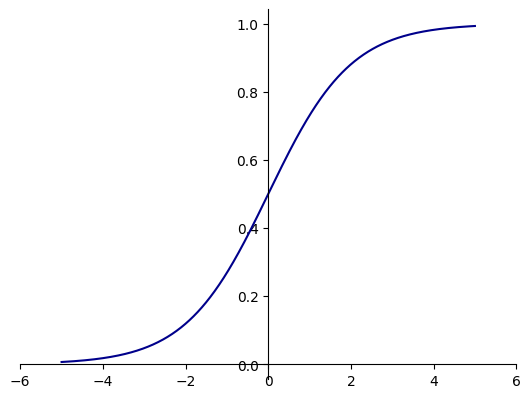

In [39]:
# 这个表示在-5到5之间生成1000个x值
x=np.linspace(-5,5,1000)
# 对上述生成的1000个数循环用sigmoid公式求对应的y
y=[1/(1+np.exp(-i)) for i in x]
plot_func(x, y)

### ReLU 函数图像

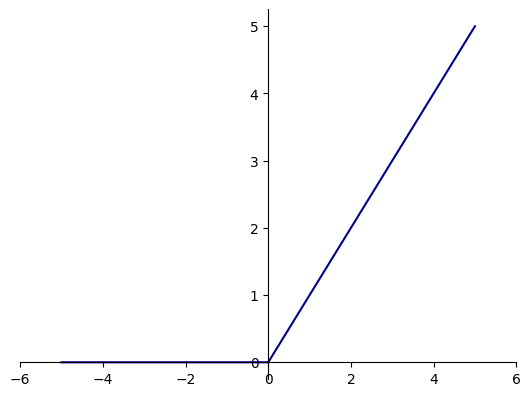

In [40]:
# 这个表示在-5到5之间生成1000个x值
x=np.linspace(-5,5,1000)
# 对上述生成的1000个数循环用公式求对应的y
y=[i if i >0 else 0 for i in x]
plot_func(x, y)

In [41]:
out = tf.nn.relu(x)

In [42]:
out.shape

TensorShape([1000])

### LeakyReLU

In [43]:
out = tf.nn.leaky_relu(x, alpha=0.1) # 通过LeakyReLU激活函数

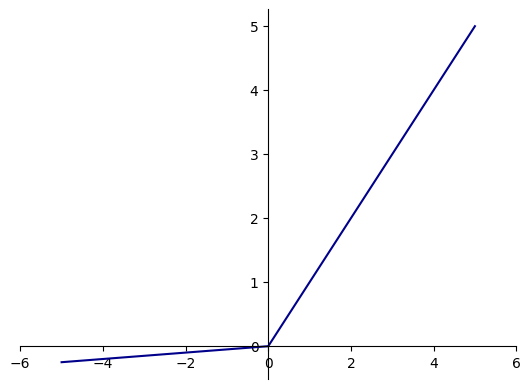

In [44]:
# 这个表示在-5到5之间生成1000个x值
x=np.linspace(-5,5,1000)
# 对上述生成的1000个数循环用公式求对应的y
y=[i if i >0 else 0.05*i for i in x]
plot_func(x, y)

### Tanh函数

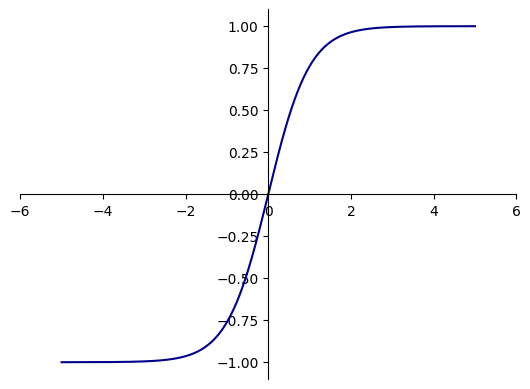

In [45]:
# 这个表示在-5到5之间生成1000个x值
x=np.linspace(-5,5,1000)
# 对上述生成的1000个数循环用公式求对应的y
# 这里演示将tf的张量转换为numpy 的方法
y=tf.nn.tanh(x).numpy()
plot_func(x, y)

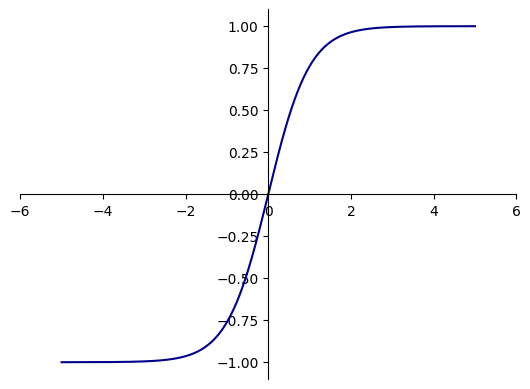

In [46]:
# 这个表示在-5到5之间生成1000个x值
x=np.linspace(-5,5,1000)
# 对上述生成的1000个数循环用公式求对应的y
#sigmoid
def sigmoid(x_i):
    return 1/(1+np.exp(-x_i))
#tanh
y=[2*sigmoid(2*i) - 1 for i in x]
plot_func(x, y)

## 输出层网络的设计

### 输出在0到1之间

In [47]:
x = tf.linspace(-6.,6.,10)
tf.nn.sigmoid(x) # 通过Sigmoid 函数

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00247262, 0.00931596, 0.0344452 , 0.11920292, 0.33924365,
       0.6607564 , 0.8807971 , 0.96555483, 0.99068403, 0.99752736],
      dtype=float32)>

### 多输出概率和为一

In [48]:
z=tf.constant([2.,1.,0.1])

In [49]:
z.shape

TensorShape([3])

In [50]:
tf.nn.softmax(z) # 通过Softmax 函数

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.6590012 , 0.24243298, 0.09856589], dtype=float32)>

In [51]:
tf.reduce_sum(tf.nn.softmax(z))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001>

### 输出范围在[-1,1]

In [52]:
x = tf.linspace(-6.,6.,10)
tf.tanh(x) # tanh 激活函数

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.99998784, -0.99982315, -0.9974579 , -0.9640276 , -0.58278286,
        0.58278316,  0.9640276 ,  0.99745804,  0.99982315,  0.99998784],
      dtype=float32)>

## 损失函数计算

#### 均方误差损失函数

In [55]:
from tensorflow import keras
o = tf.random.normal([2,10]) # 构造网络输出
y_onehot = tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = keras.losses.MSE(y_onehot, o) # 计算均方差

In [56]:
o

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 0.6983636 ,  0.9311323 ,  1.2151687 , -0.3197697 ,  0.11244939,
         1.3768651 , -0.7521975 , -1.5441525 ,  0.19541185, -0.7112191 ],
       [ 1.277041  , -1.1982138 , -0.9851417 ,  0.3681799 , -0.52497494,
        -2.4486415 ,  0.65530074, -0.5166455 ,  0.21156989,  0.9883786 ]],
      dtype=float32)>

In [57]:
y_onehot

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [58]:
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.7473971, 1.2425691], dtype=float32)>

In [60]:
loss = tf.reduce_mean(loss) # 计算batch 均方差

In [61]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.9949831>

# 创建MSE 类

In [62]:
criteon = keras.losses.MeanSquaredError()
loss = criteon(y_onehot,o) # 计算batch 均方差

In [63]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.9949831>

#### 交叉熵损失函数

In [64]:
z = tf.random.normal([2,10]) # 构造输出层的输出
y_onehot = tf.constant([1,3]) # 构造真实值
y_onehot = tf.one_hot(y_onehot, depth=10) # one-hot 编码
# 输出层未使用Softmax 函数，故from_logits 设置为True
# 这样categorical_crossentropy 函数在计算损失函数前，会先内部调用Softmax 函数
loss = keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True)
loss = tf.reduce_mean(loss) # 计算平均交叉熵损失
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.7563567>